<a href="https://colab.research.google.com/github/MegaSapiens/telegram-bot/blob/master/my_PyArrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list | grep pyarrow

pyarrow                            16.1.0
pyarrow-hotfix                     0.6


In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [ ]:
print(pa.__doc__)


PyArrow is the python implementation of Apache Arrow.

Apache Arrow is a cross-language development platform for in-memory data.
It specifies a standardized language-independent columnar memory format for
flat and hierarchical data, organized for efficient analytic operations on
modern hardware. It also provides computational libraries and zero-copy
streaming messaging and interprocess communication.

For more information see the official page at https://arrow.apache.org



In [ ]:
%ls -la /content/drive/MyDrive/myDATA

total 8620
-rw------- 1 root root 8825952 Oct  4 22:54 ls_laiR.parquet


### Ссылка на мои Гуглдоки:  /content/drive/MyDrive/myDATA

 Тут и будем хранить базы знаний

In [ ]:
help(pq.core.read_pandas)

Help on function read_pandas in module pyarrow.parquet.core:

read_pandas(source, columns=None, **kwargs)
    Read a Table from Parquet format, also reading DataFrame
    index values if known in the file metadata
    
    Parameters
    ----------
    source : str, pyarrow.NativeFile, or file-like object
        If a string passed, can be a single file name or directory name. For
        file-like objects, only read a single file. Use pyarrow.BufferReader to
        read a file contained in a bytes or buffer-like object.
    columns : list
        If not None, only these columns will be read from the file. A column
        name may be a prefix of a nested field, e.g. 'a' will select 'a.b',
        'a.c', and 'a.d.e'. If empty, no columns will be read. Note
        that the table will still have the correct num_rows set despite having
        no columns.
    use_threads : bool, default True
        Perform multi-threaded column reads.
    schema : Schema, optional
        Optionally pr

In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/pyarrow/parquet/

core.py  encryption.py	__init__.py  __pycache__


In [ ]:
!cat /content/sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://docs.google.com/document/d/e/2PACX-1vRhYtsvc5eOR2FWNCwaBiKL6suIOrxJig8LcSBbmCbyYsayia_DvPOOBlXZ4CAlQ5nlDD8kTaIDRwrN/pub

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


<Axes: xlabel='longitude'>

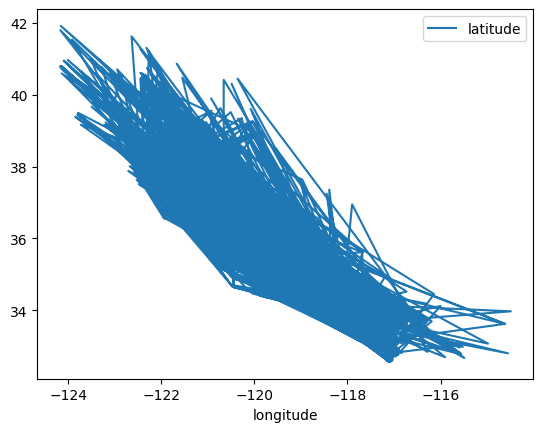

In [ ]:
df.plot("longitude", "latitude")

In [ ]:
!cat /content/sample_data/anscombe.json

[
  {"Series":"I", "X":10.0, "Y":8.04},
  {"Series":"I", "X":8.0, "Y":6.95},
  {"Series":"I", "X":13.0, "Y":7.58},
  {"Series":"I", "X":9.0, "Y":8.81},
  {"Series":"I", "X":11.0, "Y":8.33},
  {"Series":"I", "X":14.0, "Y":9.96},
  {"Series":"I", "X":6.0, "Y":7.24},
  {"Series":"I", "X":4.0, "Y":4.26},
  {"Series":"I", "X":12.0, "Y":10.84},
  {"Series":"I", "X":7.0, "Y":4.81},
  {"Series":"I", "X":5.0, "Y":5.68},

  {"Series":"II", "X":10.0, "Y":9.14},
  {"Series":"II", "X":8.0, "Y":8.14},
  {"Series":"II", "X":13.0, "Y":8.74},
  {"Series":"II", "X":9.0, "Y":8.77},
  {"Series":"II", "X":11.0, "Y":9.26},
  {"Series":"II", "X":14.0, "Y":8.10},
  {"Series":"II", "X":6.0, "Y":6.13},
  {"Series":"II", "X":4.0, "Y":3.10},
  {"Series":"II", "X":12.0, "Y":9.13},
  {"Series":"II", "X":7.0, "Y":7.26},
  {"Series":"II", "X":5.0, "Y":4.74},

  {"Series":"III", "X":10.0, "Y":7.46},
  {"Series":"III", "X":8.0, "Y":6.77},
  {"Series":"III", "X":13.0, "Y":12.74},
  {"Series":"III", "X":9.0, "Y":7.11},
 

In [ ]:
!ls --help

Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
  -b, --escape               print C-style escapes for nongraphic characters
      --block-size=SIZE      with -l, scale sizes by SIZE when printing them;
                               e.g., '--block-size=M'; see SIZE format below
  -B, --ignore-backups       do not list implied entries ending with ~
  -c                         with -lt: sort by, and show, ctime (time of last
                               modification of file status information);
                               with -l: show ctime and sort by name;
                               othe

ls: invalid argument ‘atimes’ for ‘--time’
Valid arguments are:
  - ‘atime’, ‘access’, ‘use’
  - ‘ctime’, ‘status’
  - ‘birth’, ‘creation’

ls: invalid argument ‘full-iso1’ for ‘time style’
Valid arguments are:
  - [posix-]full-iso
  - [posix-]long-iso
  - [posix-]iso
  - [posix-]locale
  - +FORMAT (e.g., +%H:%M) for a 'date'-style format



In [ ]:
!ls -lai --time-style=long-iso /

total 112
2883621 drwxr-xr-x   1 root root  4096 2024-10-04 18:17 .
2883621 drwxr-xr-x   1 root root  4096 2024-10-04 18:17 ..
 131076 lrwxrwxrwx   1 root root     7 2023-10-04 02:08 bin -> usr/bin
 131077 drwxr-xr-x   2 root root  4096 2022-04-18 10:28 boot
2228244 drwxr-xr-x   1 root root  4096 2024-10-04 19:47 content
2359302 -rw-r--r--   1 root root  4332 2023-11-10 04:56 cuda-keyring_1.0-1_all.deb
5242905 drwxr-xr-x   1 root root  4096 2024-10-03 13:47 datalab
      1 drwxr-xr-x   5 root root   360 2024-10-04 18:17 dev
4718629 -rwxr-xr-x   1 root root     0 2024-10-04 18:17 .dockerenv
4718631 drwxr-xr-x   1 root root  4096 2024-10-04 18:17 etc
 131254 drwxr-xr-x   2 root root  4096 2022-04-18 10:28 home
 131255 lrwxrwxrwx   1 root root     7 2023-10-04 02:08 lib -> usr/lib
 131256 lrwxrwxrwx   1 root root     9 2023-10-04 02:08 lib32 -> usr/lib32
 131257 lrwxrwxrwx   1 root root     9 2023-10-04 02:08 lib64 -> usr/lib64
 131258 lrwxrwxrwx   1 root root    10 2023-10-04 02:08 libx3

In [ ]:
!ls -laiR --time-style=long-iso / > ls_laiR.log

ls: cannot read symbolic link '/proc/77/cwd': No such file or directory
ls: cannot read symbolic link '/proc/77/root': No such file or directory
ls: cannot read symbolic link '/proc/77/exe': No such file or directory
ls: reading directory '/proc/77/net': Invalid argument
ls: cannot read symbolic link '/proc/77/ns/net': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/uts': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/ipc': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/pid_for_children': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/mnt': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/cgroup': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/time': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/time_for_children': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/cwd': No such file or directory
ls: cannot read s

In [ ]:
err = '''
ls: cannot read symbolic link '/proc/77/cwd': No such file or directory
ls: cannot read symbolic link '/proc/77/root': No such file or directory
ls: cannot read symbolic link '/proc/77/exe': No such file or directory
ls: reading directory '/proc/77/net': Invalid argument
ls: cannot read symbolic link '/proc/77/ns/net': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/uts': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/ipc': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/pid_for_children': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/mnt': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/cgroup': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/time': No such file or directory
ls: cannot read symbolic link '/proc/77/ns/time_for_children': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/cwd': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/root': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/exe': No such file or directory
ls: reading directory '/proc/77/task/77/net': Invalid argument
ls: cannot read symbolic link '/proc/77/task/77/ns/net': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/uts': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/ipc': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/pid_for_children': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/mnt': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/cgroup': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/time': No such file or directory
ls: cannot read symbolic link '/proc/77/task/77/ns/time_for_children': No such file or directory
'''
len(err.split('\n'))

26

In [ ]:
%ls -lai --time-style=long-iso /proc/770

total 0
 40145 dr-xr-xr-x   9 root root 0 2024-10-05 10:00 ./
     1 dr-xr-xr-x 199 root root 0 2024-10-05 09:57 ../
328748 -r--r--r--   1 root root 0 2024-10-05 10:40 arch_status
328729 dr-xr-xr-x   2 root root 0 2024-10-05 10:40 attr/
328707 -r--------   1 root root 0 2024-10-05 10:40 auxv
328734 -r--r--r--   1 root root 0 2024-10-05 10:40 cgroup
328725 --w-------   1 root root 0 2024-10-05 10:40 clear_refs
328714 -r--r--r--   1 root root 0 2024-10-05 10:40 cmdline
328712 -rw-r--r--   1 root root 0 2024-10-05 10:40 comm
328740 -rw-r--r--   1 root root 0 2024-10-05 10:40 coredump_filter
328733 -r--r--r--   1 root root 0 2024-10-05 10:40 cpuset
328719 lrwxrwxrwx   1 root root 0 2024-10-05 10:40 cwd -> /content/
328706 -r--------   1 root root 0 2024-10-05 10:40 environ
328721 lrwxrwxrwx   1 root root 0 2024-10-05 10:40 exe -> /usr/bin/grep*
327677 dr-x------   2 root root 0 2024-10-05 10:40 fd/
327679 dr-xr-xr-x   2 root root 0 2024-10-05 10:40 fdinfo/
328743 -rw-r--r--   1 root root 0

In [ ]:
!tail ls_laiR.log

/var/spool:
total 12
 134589 drwxr-xr-x 2 root root 4096 2023-10-04 02:08 .
5254720 drwxr-xr-x 1 root root 4096 2024-10-03 13:47 ..
 134590 lrwxrwxrwx 1 root root    7 2023-10-04 02:08 mail -> ../mail

/var/tmp:
total 12
 134591 drwxrwxrwt 2 root root 4096 2023-10-04 02:12 .
5254720 drwxr-xr-x 1 root root 4096 2024-10-03 13:47 ..


In [ ]:
lsp

['5254720',
 'drwxr-xr-x',
 '1',
 'root',
 'root',
 '4096',
 '2024-10-03',
 '13:47',
 '..']

In [ ]:
# Читаем лог файл полученный при работе команды ls -laiR
with open('ls_laiR.log') as f:
  perent = f.readline()[:-2] # Читаем первую строку файла без перевода строки
  print("1-я строка", perent)
  folders = {}  # Таблица доступных папок
  db = []  # Таблица по всем доступным файлам
  # Обработаем файл построчно
  while True:
    line = f.readline() # Читаем очередную строку файпа
    if not line:
      break  # Конец файла
    elif line == "\n":
      # После пустой строки меняем родительскую папку
      perent = f.readline()[:-2]
    elif "total " in line:
      # Если встретили строку с общим количеством файлов
      folders[perent] = int(line.split()[1])
    else:

      lsp = line[:-1].split()
      ll = len(lsp) - 8
      if ll > 1:
        if "," in lsp[5]:
          lsp = lsp[:5] + ["None"] + lsp[7:-1] + [lsp[-1] + f' #({lsp[5]+lsp[6]})']
        else:
          lsp = lsp[:-ll] + ["".join(lsp[-ll:])]
      if len(lsp) != 9:
        print("lsp>10", lsp)
        break
      db.append([perent] + lsp)

len(folders), len(db), db[:3]

(55879,
 582497,
 [['/',
   '2883621',
   'drwxr-xr-x',
   '1',
   'root',
   'root',
   '4096',
   '2024-10-04',
   '18:17',
   '.'],
  ['/',
   '2883621',
   'drwxr-xr-x',
   '1',
   'root',
   'root',
   '4096',
   '2024-10-04',
   '18:17',
   '..'],
  ['/',
   '131076',
   'lrwxrwxrwx',
   '1',
   'root',
   'root',
   '7',
   '2023-10-04',
   '02:08',
   'bin->usr/bin']])

In [ ]:
columns = ["path", "inode", "perm", "link", "UID", "GID", "size", "date", "time", "name"]

df = pd.DataFrame(db, columns=columns)
df['inode'] = df['inode'].astype('int64')
df['link'] = df['link'].astype('int32')
df['size'] = df['size'].str.replace('None', '0').astype('int64')
# Преобразуем столбцы 'date' и 'time' в datetime
#df['date'] = pd.to_datetime(df['date'])
#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df

,path,inode,perm,link,UID,GID,size,date,time,name
0,/,2883621,drwxr-xr-x,1,root,root,4096,2024-10-04,18:17,.
1,/,2883621,drwxr-xr-x,1,root,root,4096,2024-10-04,18:17,..
2,/,131076,lrwxrwxrwx,1,root,root,7,2023-10-04,02:08,bin->usr/bin
3,/,131077,drwxr-xr-x,2,root,root,4096,2022-04-18,10:28,boot
4,/,2228244,drwxr-xr-x,1,root,root,4096,2024-10-04,19:47,content
...,...,...,...,...,...,...,...,...,...,...
582492,/var/spool,134589,drwxr-xr-x,2,root,root,4096,2023-10-04,02:08,.
582493,/var/spool,5254720,drwxr-xr-x,1,root,root,4096,2024-10-03,13:47,..
582494,/var/spool,134590,lrwxrwxrwx,1,root,root,7,2023-10-04,02:08,mail->../mail
582495,/var/tmp,134591,drwxrwxrwt,2,root,root,4096,2023-10-04,02:12,.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582497 entries, 0 to 582496
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   path    582497 non-null  object
 1   inode   582497 non-null  int64 
 2   perm    582497 non-null  object
 3   link    582497 non-null  int32 
 4   UID     582497 non-null  object
 5   GID     582497 non-null  object
 6   size    582497 non-null  int64 
 7   date    582497 non-null  object
 8   time    582497 non-null  object
 9   name    582497 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 42.2+ MB


In [ ]:
%ls -lai --time-style=long-iso /proc/1/fd/

total 0
18530 dr-x------ 2 root root  0 2024-10-05 09:57 ./
18511 dr-xr-xr-x 9 root root  0 2024-10-05 09:57 ../
18531 lrwx------ 1 root root 64 2024-10-05 09:57 0 -> /dev/null
18532 l-wx------ 1 root root 64 2024-10-05 09:57 1 -> 'pipe:[18098]'
18533 l-wx------ 1 root root 64 2024-10-05 09:57 2 -> 'pipe:[18099]'


In [ ]:
df.describe()

,inode,link,size
count,5.824970e+05,582497.000000,5.824970e+05
mean,9.252576e+07,3.469635,6.669617e+04
std,5.887221e+08,17.259985,5.171251e+06
min,1.000000e+00,1.000000,0.000000e+00
25%,1.225416e+06,1.000000,5.680000e+02
50%,5.122898e+06,1.000000,3.813000e+03
75%,6.705380e+06,2.000000,4.096000e+03
max,4.026533e+09,379.000000,2.384259e+09


In [ ]:
df[df['size'].lt(1)]

,path,inode,perm,link,UID,GID,size,date,time,name
8,/,4718629,-rwxr-xr-x,1,root,root,0,2024-10-04,18:17,.dockerenv
19,/,1,dr-xr-xr-x,199,root,root,0,2024-10-04,18:17,proc
25,/,1,dr-xr-xr-x,13,root,root,0,2024-10-04,18:17,sys
37,/content,2883858,-rw-r--r--,1,root,root,0,2024-10-04,20:51,ls_laiR.log
42,/content/.config,31,-rw-r--r--,1,root,root,0,2024-10-03,13:24,config_sentinel
...,...,...,...,...,...,...,...,...,...,...
582441,/var/lib/systemd/deb-systemd-user-helper-enabl...,5135446,-rw-r--r--,1,root,root,0,2024-10-03,13:16,pk-debconf-helper.socket
582450,/var/lib/ucf,5135455,-rw-r--r--,1,root,root,0,2024-10-03,13:18,hashfile.2
582452,/var/lib/ucf,5135457,-rw-r--r--,1,root,root,0,2024-10-03,13:18,registry.0
582469,/var/log,134581,-rw-rw----,1,root,utmp,0,2023-10-04,02:08,btmp


In [ ]:
%ls -lai --time-style=long-iso /root/.cache/pip/http-v2/4/4/f/c/8

total 2328396
6031187 drwxr-xr-x 2 root root       4096 2024-10-03 13:29 ./
6031186 drwxr-xr-x 3 root root       4096 2024-10-03 13:25 ../
6031188 -rw------- 1 root root        606 2024-10-03 13:29 44fc8aa2517977da7dc952570d12a400f3cf35d6b765af7e939290e1
6031189 -rw------- 1 root root 2384258847 2024-10-03 13:25 44fc8aa2517977da7dc952570d12a400f3cf35d6b765af7e939290e1.body


In [ ]:
df.to_parquet('/content/drive/MyDrive/myDATA/ls_laiR.parquet')

In [ ]:
%ls -sh '/content/drive/MyDrive/myDATA/ls_laiR.parquet'

8.5M /content/drive/MyDrive/myDATA/ls_laiR.parquet


# Загрузка данных в pyarrow и pandas
%ls -sh '/content/drive/MyDrive/myDATA/ls_laiR.parquet'

8.5M /content/drive/MyDrive/myDATA/ls_laiR.parquet

In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
dir(pa.Array)

['__array__',
 '__arrow_c_array__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_debug_print',
 '_export_to_c',
 '_export_to_c_device',
 '_import_from_c',
 '_import_from_c_capsule',
 '_import_from_c_device',
 '_name',
 '_to_pandas',
 'buffers',
 'cast',
 'dictionary_encode',
 'diff',
 'drop_null',
 'equals',
 'fill_null',
 'filter',
 'format',
 'from_buffers',
 'from_pandas',
 'get_total_buffer_size',
 'index',
 'is_nan',
 'is_null',
 'is_valid',
 'nbytes',
 'null_count',
 'offset',
 'slice',
 'sort',
 'sum',
 'take',
 'to_numpy',
 'to_pandas',
 'to_

In [2]:
# Загрузка данных
parr = pq.ParquetFile('/content/drive/MyDrive/myDATA/ls_laiR.parquet')
parr.metadata, parr.schema, parr.num_row_groups

(<pyarrow._parquet.FileMetaData object at 0x7a0bad6bee30>
   created_by: parquet-cpp-arrow version 16.1.0
   num_columns: 10
   num_rows: 582497
   num_row_groups: 1
   format_version: 2.6
   serialized_size: 5322,
 required group field_id=-1 schema {
   optional binary field_id=-1 path (String);
   optional int64 field_id=-1 inode;
   optional binary field_id=-1 perm (String);
   optional int32 field_id=-1 link;
   optional binary field_id=-1 UID (String);
   optional binary field_id=-1 GID (String);
   optional int64 field_id=-1 size;
   optional binary field_id=-1 date (String);
   optional binary field_id=-1 time (String);
   optional binary field_id=-1 name (String);
 },
 1)

In [3]:
del parr

In [4]:
# Чидаем данные из файла формата ParquetDataset
table = pq.read_table('/content/drive/MyDrive/myDATA/ls_laiR.parquet')
# Вызывем метод to_pandas() для преобразования в датафрейм
df = table.to_pandas()
df

,path,inode,perm,link,UID,GID,size,date,time,name
0,/,2883621,drwxr-xr-x,1,root,root,4096,2024-10-04,18:17,.
1,/,2883621,drwxr-xr-x,1,root,root,4096,2024-10-04,18:17,..
2,/,131076,lrwxrwxrwx,1,root,root,7,2023-10-04,02:08,bin->usr/bin
3,/,131077,drwxr-xr-x,2,root,root,4096,2022-04-18,10:28,boot
4,/,2228244,drwxr-xr-x,1,root,root,4096,2024-10-04,19:47,content
...,...,...,...,...,...,...,...,...,...,...
582492,/var/spool,134589,drwxr-xr-x,2,root,root,4096,2023-10-04,02:08,.
582493,/var/spool,5254720,drwxr-xr-x,1,root,root,4096,2024-10-03,13:47,..
582494,/var/spool,134590,lrwxrwxrwx,1,root,root,7,2023-10-04,02:08,mail->../mail
582495,/var/tmp,134591,drwxrwxrwt,2,root,root,4096,2023-10-04,02:12,.


In [5]:
df.dtypes

,0
path,object
inode,int64
perm,object
link,int32
UID,object
GID,object
size,int64
date,object
time,object
name,object


<Axes: xlabel='Индекс', ylabel='Значение inode'>

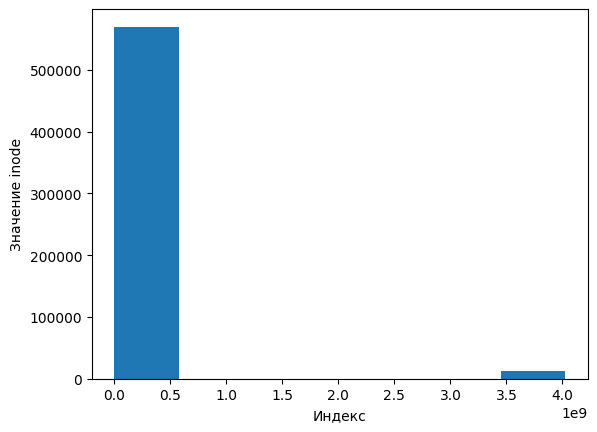

In [7]:
df['inode'].plot(xlabel='Индекс', ylabel='Значение inode', kind='hist', bins=7)

In [24]:
df['inode'].info()

<class 'pandas.core.series.Series'>
Index: 582497 entries, 0 to 582496
Series name: inode
Non-Null Count   Dtype
--------------   -----
582497 non-null  int64
dtypes: int64(1)
memory usage: 8.9 MB


In [6]:
df['inode'].describe()

,inode
count,5.824970e+05
mean,9.252576e+07
std,5.887221e+08
min,1.000000e+00
25%,1.225416e+06
50%,5.122898e+06
75%,6.705380e+06
max,4.026533e+09


 **('line'**, 'bar', 'barh', **'kde'**, '**density**', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')**Текст, выделенный полужирным шрифтом**

<Axes: xlabel='Значение inode', ylabel='Индекс'>

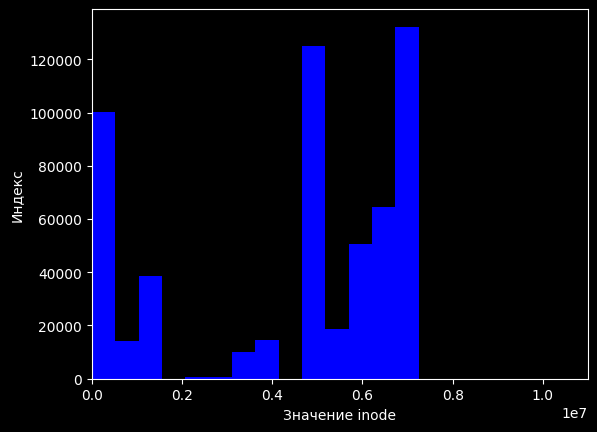

In [89]:
df['inode'].plot(kind='hist', bins=777, x=df['inode'],  y=df.index, ylabel='Индекс', xlabel='Значение inode', color='blue', xlim=(0, 1.1e7))

<Axes: xlabel='Значение inode', ylabel='Индекс'>

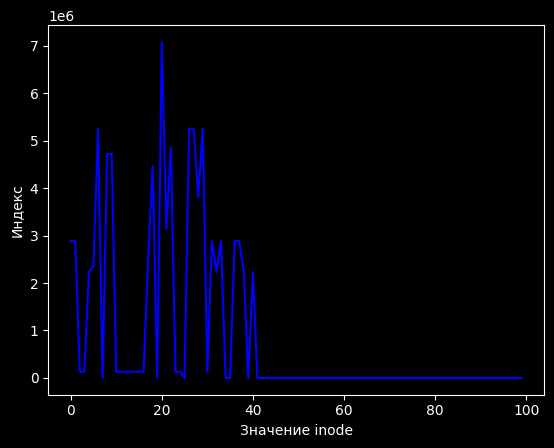

In [64]:
df['inode'][:100].plot(kind='line', x=df['inode'],  y=df.index, ylabel='Индекс', xlabel='Значение inode', color='blue')

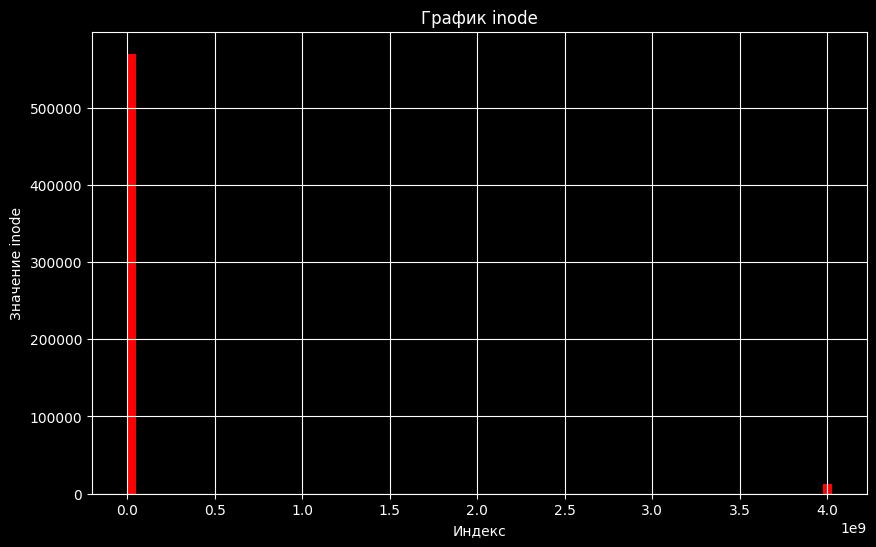

In [70]:
import matplotlib.pyplot as plt

# Создаем темную тему
plt.style.use('dark_background')

df['inode'].plot(
    kind='hist',  #  Тип графика
    bins=77,  #  Количество бинов
    xlabel='Индекс',
    ylabel='Значение inode',
    title='График inode',
    color='red',  # Цвет линии
    figsize=(10, 6), # Размер графика (ширина, высота)
    grid=True,  #  Добавляем сетку
)

# Дополнительные настройки для темной темы
plt.gca().xaxis.label.set_color('white')  # Цвет подписи оси X
plt.gca().yaxis.label.set_color('white')  # Цвет подписи оси Y
plt.gca().title.set_color('white')   # Цвет заголовка

plt.show()

<Axes: xlabel='Индекс', ylabel='Размер'>

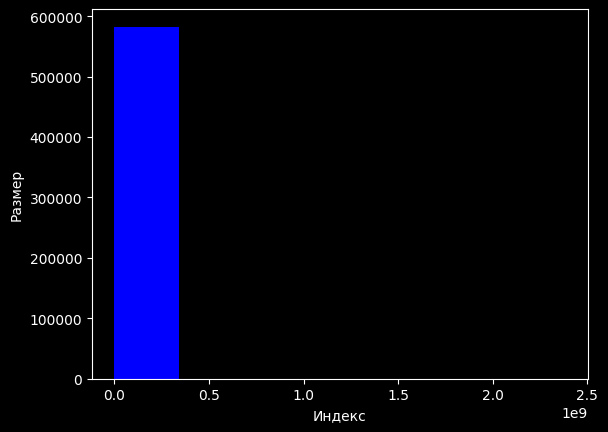

In [74]:
df['size'].plot(kind='hist', bins=7, x=df.index,  y=df['size'], ylabel='Размер', xlabel='Индекс', color='blue')

<Axes: xlabel='inode', ylabel='link'>

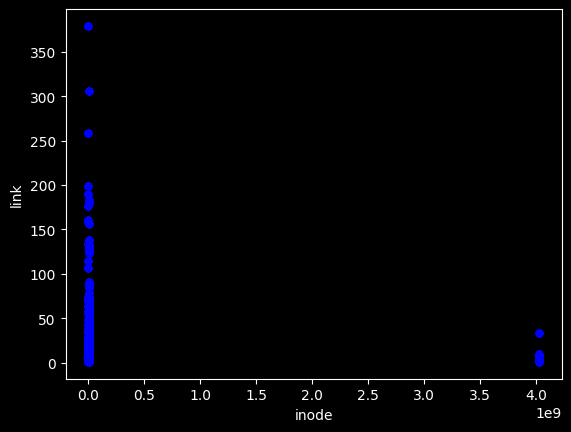

In [91]:
df.plot(kind='scatter', x='inode', y='link', color='blue')

<Axes: xlabel='size', ylabel='link'>

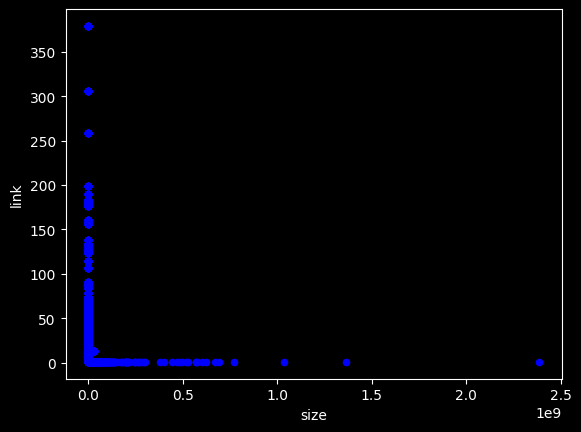

In [92]:
df.plot(kind='scatter', x='size', y='link', color='blue')

In [4]:
# Срез по нулевым значениям размера (size) объктов
df[df['size'].eq(0)]

,path,inode,perm,link,UID,GID,size,date,time,name
8,/,4718629,-rwxr-xr-x,1,root,root,0,2024-10-04,18:17,.dockerenv
19,/,1,dr-xr-xr-x,199,root,root,0,2024-10-04,18:17,proc
25,/,1,dr-xr-xr-x,13,root,root,0,2024-10-04,18:17,sys
37,/content,2883858,-rw-r--r--,1,root,root,0,2024-10-04,20:51,ls_laiR.log
42,/content/.config,31,-rw-r--r--,1,root,root,0,2024-10-03,13:24,config_sentinel
...,...,...,...,...,...,...,...,...,...,...
582441,/var/lib/systemd/deb-systemd-user-helper-enabl...,5135446,-rw-r--r--,1,root,root,0,2024-10-03,13:16,pk-debconf-helper.socket
582450,/var/lib/ucf,5135455,-rw-r--r--,1,root,root,0,2024-10-03,13:18,hashfile.2
582452,/var/lib/ucf,5135457,-rw-r--r--,1,root,root,0,2024-10-03,13:18,registry.0
582469,/var/log,134581,-rw-rw----,1,root,utmp,0,2023-10-04,02:08,btmp


In [6]:
f'{round(58311/582497 * 100, 5)} %'

'10.01052 %'

 ```  10.01 %  ``` объектов с нулевым размером.



In [7]:
# Выводим строку по индексу
row = df.iloc[582441]
row.dtype, row.path # Выводим путь

(dtype('O'),
 '/var/lib/systemd/deb-systemd-user-helper-enabled/sockets.target.wants')

In [8]:
# Находим строку по значению в столбце 'столбец'
row = df[df['inode'] == "3679032"]

# Выводим все значения строки
print(row)

Empty DataFrame
Columns: [path, inode, perm, link, UID, GID, size, date, time, name]
Index: []


In [10]:

df[df['path'].str.contains('/usr/src/linux-headers-5.15.0-122-generic/incl')]

,path,inode,perm,link,UID,GID,size,date,time,name
567731,/usr/src/linux-headers-5.15.0-122-generic/include,5122587,drwxr-xr-x,4,root,root,4096,2024-10-03,13:21,.
567732,/usr/src/linux-headers-5.15.0-122-generic/include,4891587,drwxr-xr-x,7,root,root,4096,2024-10-03,13:21,..
567733,/usr/src/linux-headers-5.15.0-122-generic/include,5122588,lrwxrwxrwx,1,root,root,43,2024-08-29,12:23,acpi->../../linux-headers-5.15.0-122/include/acpi
567734,/usr/src/linux-headers-5.15.0-122-generic/include,5122589,lrwxrwxrwx,1,root,root,50,2024-08-29,12:23,asm-generic->../../linux-headers-5.15.0-122/in...
567735,/usr/src/linux-headers-5.15.0-122-generic/include,5122590,lrwxrwxrwx,1,root,root,50,2024-08-29,12:23,clocksource->../../linux-headers-5.15.0-122/in...
...,...,...,...,...,...,...,...,...,...,...
576605,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131426,drwxr-xr-x,3,root,root,4096,2024-10-03,13:21,..
576606,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131433,drwxr-xr-x,2,root,root,4096,2024-10-03,13:21,linux
576607,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131433,drwxr-xr-x,2,root,root,4096,2024-10-03,13:21,.
576608,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131432,drwxr-xr-x,3,root,root,4096,2024-10-03,13:21,..


In [ ]:
df[df['path'].str.contains('/usr/src/linux-headers-5.15.0-122-generic/incl')]

,path,inode,perm,link,UID,GID,size,date,time,name
567731,/usr/src/linux-headers-5.15.0-122-generic/include,5122587,drwxr-xr-x,4,root,root,4096,2024-10-03,13:21,.
567732,/usr/src/linux-headers-5.15.0-122-generic/include,4891587,drwxr-xr-x,7,root,root,4096,2024-10-03,13:21,..
567733,/usr/src/linux-headers-5.15.0-122-generic/include,5122588,lrwxrwxrwx,1,root,root,43,2024-08-29,12:23,acpi->../../linux-headers-5.15.0-122/include/acpi
567734,/usr/src/linux-headers-5.15.0-122-generic/include,5122589,lrwxrwxrwx,1,root,root,50,2024-08-29,12:23,asm-generic->../../linux-headers-5.15.0-122/in...
567735,/usr/src/linux-headers-5.15.0-122-generic/include,5122590,lrwxrwxrwx,1,root,root,50,2024-08-29,12:23,clocksource->../../linux-headers-5.15.0-122/in...
...,...,...,...,...,...,...,...,...,...,...
576605,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131426,drwxr-xr-x,3,root,root,4096,2024-10-03,13:21,..
576606,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131433,drwxr-xr-x,2,root,root,4096,2024-10-03,13:21,linux
576607,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131433,drwxr-xr-x,2,root,root,4096,2024-10-03,13:21,.
576608,/usr/src/linux-headers-5.15.0-122-generic/incl...,5131432,drwxr-xr-x,3,root,root,4096,2024-10-03,13:21,..


In [ ]:
%ls -laiS /proc/config.gz

4026532066 -r--r--r-- 1 root root 27553 Oct  5 06:45 /proc/config.gz


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582497 entries, 0 to 582496
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   path    582497 non-null  object
 1   inode   582497 non-null  int64 
 2   perm    582497 non-null  object
 3   link    582497 non-null  int32 
 4   UID     582497 non-null  object
 5   GID     582497 non-null  object
 6   size    582497 non-null  int64 
 7   date    582497 non-null  object
 8   time    582497 non-null  object
 9   name    582497 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 42.2+ MB


In [ ]:
df[['path', 'perm', 'UID', 'GID', 'date', 'time', 'name']].describe()

,path,perm,UID,GID,date,time,name
count,582497,582497,582497,582497,582497,582497,582497
unique,55861,39,5,13,996,975,198166
top,/usr/src/linux-headers-5.15.0-122-generic/incl...,-rw-r--r--,root,root,2024-10-03,13:42,.
freq,8833,330779,576426,576406,360131,75539,55849


In [ ]:
# Вычисляем количество каждого значения для каждого столбца
top_values = df.apply(lambda x: pd.Series(x).value_counts().fillna(0).idxmax())

# Транспонируем результат и преобразуем его в DataFrame
top_df = pd.DataFrame(top_values).transpose()

# Отображаем DataFrame с самыми частыми значениями
for index, row in top_df.iterrows():
    print(row)

path     /usr/src/linux-headers-5.15.0-122-generic/incl...
inode                                              3679032
perm                                            -rw-r--r--
link                                                     1
UID                                                   root
GID                                                   root
size                                                  4096
date                                            2024-10-03
time                                                 13:42
name                                                     .
Name: 0, dtype: object


In [ ]:
# Выбираем столбец и получаем список уникальных значений
permissions = df['perm'].unique()

# Выводим уникальные значения
len(permissions), permissions

(39,
 array(['drwxr-xr-x', 'lrwxrwxrwx', '-rw-r--r--', '-rwxr-xr-x',
        'dr-xr-xr-x', 'drwx------', 'drwxrwxrwt', '-rw-------',
        'dr-x------', '-r-xr-xr-x', 'crw-rw-rw-', 'crw--w----',
        '-rw-r-----', '-r--r-----', '-r--r--r--', '-r--------',
        '--w-------', 'dr-x--x--x', '-rw-rw-rw-', 'lrwx------',
        'l-wx------', 'lr--------', 'lr-x------', 'lrw-------',
        'drwx-----T', 'srwxr-xr-x', '-rw------T', '--w--w----',
        '-rw-rw-r--', 'srw-------', 'drwxr-x---', 'drwxrwxr-x',
        '-rwxrwxr-x', '-rwxr-sr-x', '-rwsr-xr-x', '-rwsr-xr--',
        'drwxrwsr-x', '-rw-rw----', 'drwxr-sr-x'], dtype=object))

##### Для подачи таких данных в нейронную сеть их нужно преобразовать в числовой формат.

## 1. One-hot encoding:

Нужен словарь, где ключами будут уникальные значения прав доступа, а значениями - индексы.
Для каждого значения в списке создадим вектор, заполненный нулями, и установите значение 1 на позиции, соответствующей индексу этого значения в словаре.

## 2. Разбиение на отдельные признаки:

Каждая позиция в строке прав доступа (например, drwxr-xr-x) представляет собой определенное право (чтение, запись, выполнение) для владельца, группы и остальных пользователей.
Разделите каждую строку на 10 отдельных признаков: тип файла (d, -, l, c, s, b), права владельца (rwx), права группы (rwx), права остальных (rwx).
Для каждого признака используйте one-hot encoding или другое подходящее преобразование (например, 1 для наличия права, 0 для отсутствия).

In [ ]:
unique_permissions = list(set(permissions))
perm_dict = {p: i for i, p in enumerate(unique_permissions)}

encoded_permissions = []
for p in permissions:
  encoded = [0] * len(unique_permissions)
  encoded[perm_dict[p]] = 1
  encoded_permissions.append(encoded)

# Преобразуем список списков в DataFrame pandas
df_encoded_permissions = pd.DataFrame(encoded_permissions)

# Используем атрибут shape DataFrame для получения размерности
df_encoded_permissions.shape

(39, 39)

После того как применили one-hot encoding к столбцу с правами доступа и получили матрицу (размером 39x39), вам нужно объединить её с остальными данными в вашем DataFrame, прежде чем проводить кластеризацию.

1. Объединение данных:

Если one-hot encoding был применен только к одному столбцу, преобразуйте матрицу one-hot encoding в DataFrame и объедините его с исходным DataFrame, используя pd.concat.
Убедитесь, что индексы в обоих DataFrame совпадают.

In [ ]:
# Предположим, encoded_permissions - это ваша матрица one-hot encoding
encoded_df = pd.DataFrame(encoded_permissions)

# Объединяем DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       39 non-null     int64
 1   1       39 non-null     int64
 2   2       39 non-null     int64
 3   3       39 non-null     int64
 4   4       39 non-null     int64
 5   5       39 non-null     int64
 6   6       39 non-null     int64
 7   7       39 non-null     int64
 8   8       39 non-null     int64
 9   9       39 non-null     int64
 10  10      39 non-null     int64
 11  11      39 non-null     int64
 12  12      39 non-null     int64
 13  13      39 non-null     int64
 14  14      39 non-null     int64
 15  15      39 non-null     int64
 16  16      39 non-null     int64
 17  17      39 non-null     int64
 18  18      39 non-null     int64
 19  19      39 non-null     int64
 20  20      39 non-null     int64
 21  21      39 non-null     int64
 22  22      39 non-null     int64
 23  23      39 non-nu